In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

D:\anaconda\envs\tf\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
D:\anaconda\envs\tf\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
D:\anac

In [2]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
result=pd.read_csv('Crops.csv')


In [4]:
result

,States,Rainfall,Ground Water,Temperature,Soil type,Season,Crops,Fertilisers required,Cost of cultivation,Expected revenues,Quantity of seeds per hectare,Duration of cultivation,Demand of crop,Crops for mixed cropping
0,Andhra Pradesh,110.75,9.74,31.5,Clayey,Kharif,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
1,Andhra Pradesh,110.75,9.74,31.5,Alluvial,Kharif,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
2,Arunachal Pradesh,325.00,5.00,31.5,Clayey,Kharif,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
3,Arunachal Pradesh,325.00,5.00,31.5,Alluvial,Kharif,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
4,Andhra Pradesh,110.75,9.74,33.0,Clayey,Kharif,Paddy CR Dhan 501 (IET 19189),"Potassium,Urea",22810,63851.8391,25kg,105-126,High,"Gram, Groundnut"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,Uttar Pradesh,134.65,6.00,28.5,Alluvial,Kharif,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
817,Uttar Pradesh,134.65,6.00,28.5,Black,Kharif,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
818,Uttar Pradesh,134.65,6.00,-8.5,Alluvial,rabi,Wheat PDW 314,"Phosphorus,Nitrogen",17714,50166.54,112kg,60-152,Hgh,"Horse Gram, Black Gram, Mustard"
819,Uttarakhand,164.50,7.50,37.5,Black,winter,Sweet potato,NPK(low),NaN,NaN,37kg,120-125,Low,"Legumes, Chickpea"


In [5]:
result.isnull().sum()

States                            0
Rainfall                          0
Ground Water                      0
Temperature                       0
Soil type                         0
Season                            0
Crops                             0
Fertilisers required              0
Cost of cultivation              24
Expected revenues                24
Quantity of seeds per hectare    19
Duration of cultivation           1
Demand of crop                    0
Crops for mixed cropping          0
dtype: int64

In [6]:
result.isnull().sum()

States                            0
Rainfall                          0
Ground Water                      0
Temperature                       0
Soil type                         0
Season                            0
Crops                             0
Fertilisers required              0
Cost of cultivation              24
Expected revenues                24
Quantity of seeds per hectare    19
Duration of cultivation           1
Demand of crop                    0
Crops for mixed cropping          0
dtype: int64

In [7]:
result

,States,Rainfall,Ground Water,Temperature,Soil type,Season,Crops,Fertilisers required,Cost of cultivation,Expected revenues,Quantity of seeds per hectare,Duration of cultivation,Demand of crop,Crops for mixed cropping
0,Andhra Pradesh,110.75,9.74,31.5,Clayey,Kharif,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
1,Andhra Pradesh,110.75,9.74,31.5,Alluvial,Kharif,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
2,Arunachal Pradesh,325.00,5.00,31.5,Clayey,Kharif,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
3,Arunachal Pradesh,325.00,5.00,31.5,Alluvial,Kharif,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
4,Andhra Pradesh,110.75,9.74,33.0,Clayey,Kharif,Paddy CR Dhan 501 (IET 19189),"Potassium,Urea",22810,63851.8391,25kg,105-126,High,"Gram, Groundnut"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,Uttar Pradesh,134.65,6.00,28.5,Alluvial,Kharif,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
817,Uttar Pradesh,134.65,6.00,28.5,Black,Kharif,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
818,Uttar Pradesh,134.65,6.00,-8.5,Alluvial,rabi,Wheat PDW 314,"Phosphorus,Nitrogen",17714,50166.54,112kg,60-152,Hgh,"Horse Gram, Black Gram, Mustard"
819,Uttarakhand,164.50,7.50,37.5,Black,winter,Sweet potato,NPK(low),NaN,NaN,37kg,120-125,Low,"Legumes, Chickpea"


In [8]:
result.isnull().sum()

States                            0
Rainfall                          0
Ground Water                      0
Temperature                       0
Soil type                         0
Season                            0
Crops                             0
Fertilisers required              0
Cost of cultivation              24
Expected revenues                24
Quantity of seeds per hectare    19
Duration of cultivation           1
Demand of crop                    0
Crops for mixed cropping          0
dtype: int64

In [9]:
result['States'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Haryana', 'Maharashtra',
       'Chhatisgarh', 'Chandigarh', 'Ladakh', 'Bihar', 'Nagaland',
       'Rajasthan', 'Uttar Pradesh', 'West Bengal',
       'Dadra Nagar Haveli and Daman and Diu', 'Himachal Pradesh',
       'Madhya Pradesh', 'Manipur', 'Odisha', 'Punjab', 'Sikkim',
       'Uttarakhand', 'Andaman and Nicobar Island', 'Pudducherry',
       'Karnataka', 'Meghalaya', 'Tamil Nadu', 'Tripura', 'Delhi',
       'Lakshadweep', 'Goa', 'Telangana', 'Gujarat', 'Jharkhand', 'Assam',
       'Kerela', 'Mizoram', 'Jammu and Kashmir'], dtype=object)

In [10]:
result['Soil type'].unique()

array(['Clayey', 'Alluvial', 'Black', 'Latterite', 'Red', 'Sandy'],
      dtype=object)

In [11]:
result['Season'].unique()

array(['Kharif', 'rabi', 'summar', 'winter'], dtype=object)

In [12]:
result['Crops'].unique()

array(['Paddy IGKVR-2 (IET 19795)', 'Paddy CR Dhan 501 (IET 19189)',
       'Wheat VL Gehun 907 (VL 907)', 'Wheat WHD 943',
       'Millet Nandi-65 (MH-1549)', 'Lentil Pant Lentil-8(Pant L-063)',
       'Bajra', 'Cardamom', 'Urad', 'Jowar', 'Paddy CR Dhan 401 (REETA)',
       'Millet MH 1540 (86M64) (Hybrid)', 'Sugarcane Karan 5 (Co 0124)',
       'Clove', 'Banana', 'Moong', 'Arhar', 'Oilseed', 'Tea', 'Coffee',
       'Turmeric', 'Cashewnut', 'Ragi', 'Soyabean', 'Black Gram',
       'Khesari', 'Wheat MACS 6222', 'Black Pepper', 'Chillies', 'Garlic',
       'Wheat MPO(JW) 1215 (MPO 1215)', 'Maize PMH 5 (JH 3110)',
       'Groundnut Kadiri Harithandhra (K 1319)', 'Groundnut GPBD 5',
       'Lentil Pant Lentil-7(Pant L-024)', 'Tobacco', 'Tomato', 'Cocoa',
       'Rubber', 'Masoor', 'Sunhemp', 'Varagu',
       'Paddy CR Dhan 601 (IET 18558)', 'Wheat Netravati (NIAW 1415)',
       'Maize HSC1', 'Millet Nandi-61 (MH-1548)',
       'Millet 86M64 (MSH 203) (Hybrid)', 'Barley Pusa Losar (BH- 38

In [13]:
result['Duration of cultivation'].unique()

array(['105-123', '105-126', '60-154', '60-157', '65-70', '45-60',
       '45-50', '730-735', '70-85', '65-75', '105-124', '65-73',
       '300-451', '120-180', '365-370', '60-65', '120-200', '110-115',
       '240-270', '210-270', '1030-1035', '5.0-7.0', '45-65', '125-130',
       '60-151', '120-150', '40-45', '60-150', '95-105', '110-121',
       '110-122', '45-61', '90-120', '50-60', '150-180', '120-130',
       '60-90', '160-165', '105-125', '95-100', '65-71', '65-72', '60-72',
       '95-103', '65-76', '105-120', '105-121', '105-122', '80-150',
       '120-140', '60-70', '90-100', '95-101', '175-180', '7.0-10',
       '300-450', '50-100', '105-127', '45-90', '95-102', '300-452\r',
       '60-152', '120-125', nan], dtype=object)

In [14]:
result.loc[result['States']=='Andhra Pradesh', 'States'] =1
result.loc[result['States']=='Arunachal Pradesh' , 'States'] =2
result.loc[result['States']=='Assam', 'States'] =3
result.loc[result['States']=='Bihar', 'States'] = 4
result.loc[result['States']=='Chhatisgarh', 'States'] = 5
result.loc[result['States']=='Goa', 'States'] = 6
result.loc[result['States']=='Gujarat', 'States'] = 7
result.loc[result['States']=='Haryana', 'States'] =8
result.loc[result['States']=='Himachal Pradesh', 'States'] = 9
result.loc[result['States']=='Jharkhand', 'States'] = 10
result.loc[result['States']=='Karnataka', 'States'] = 11
result.loc[result['States']=='Kerela', 'States'] = 12
result.loc[result['States']=='Madhya Pradesh', 'States'] =13
result.loc[result['States']=='Maharashtra', 'States'] = 14
result.loc[result['States']=='Manipur', 'States'] = 15
result.loc[result['States']=='Meghalaya', 'States'] = 16
result.loc[result['States']=='Mizoram', 'States'] = 17
result.loc[result['States']=='Nagaland', 'States'] = 18
result.loc[result['States']=='Odisha', 'States'] = 19
result.loc[result['States']=='Punjab', 'States'] =20
result.loc[result['States']=='Rajasthan', 'States'] = 21
result.loc[result['States']=='Sikkim', 'States'] = 22
result.loc[result['States']=='Tamil Nadu', 'States'] =23
result.loc[result['States']=='Telangana', 'States'] = 24
result.loc[result['States']=='Tripura', 'States'] = 25
result.loc[result['States']=='Uttar Pradesh', 'States'] = 26
result.loc[result['States']=='Uttarakhand', 'States'] = 27
result.loc[result['States']=='West Bengal', 'States'] = 28
result.loc[result['States']=='Andaman and Nicobar Island', 'States'] =29
result.loc[result['States']=='Dadra Nagar Haveli and Daman and Diu', 'States'] =30
result.loc[result['States']=='Chandigarh', 'States'] = 31
result.loc[result['States']=='Delhi', 'States'] =32
result.loc[result['States']=='Jammu and Kashmir', 'States'] =33
result.loc[result['States']=='Lakshadweep', 'States'] = 34
result.loc[result['States']=='Pudducherry', 'States'] = 35
result.loc[result['States']=='Ladakh', 'States'] = 36


In [15]:
result.loc[result['Soil type']=='Alluvial', 'Soil type'] =1
result.loc[result['Soil type']=='Black', 'Soil type'] = 2
result.loc[result['Soil type']=='Clayey', 'Soil type'] =3
result.loc[result['Soil type']=='Latterite', 'Soil type'] = 4
result.loc[result['Soil type']=='Red', 'Soil type'] = 5
result.loc[result['Soil type']=='Sandy', 'Soil type'] = 6

In [16]:
result.loc[result['Season']=='Kharif', 'Season'] =1
result.loc[result['Season']=='rabi', 'Season'] = 2
result.loc[result['Season']=='summar', 'Season'] =3
result.loc[result['Season']=='winter', 'Season'] =4

In [17]:
result

,States,Rainfall,Ground Water,Temperature,Soil type,Season,Crops,Fertilisers required,Cost of cultivation,Expected revenues,Quantity of seeds per hectare,Duration of cultivation,Demand of crop,Crops for mixed cropping
0,1,110.75,9.74,31.5,3,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
1,1,110.75,9.74,31.5,1,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
2,2,325.00,5.00,31.5,3,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
3,2,325.00,5.00,31.5,1,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
4,1,110.75,9.74,33.0,3,1,Paddy CR Dhan 501 (IET 19189),"Potassium,Urea",22810,63851.8391,25kg,105-126,High,"Gram, Groundnut"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,26,134.65,6.00,28.5,1,1,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
817,26,134.65,6.00,28.5,2,1,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
818,26,134.65,6.00,-8.5,1,2,Wheat PDW 314,"Phosphorus,Nitrogen",17714,50166.54,112kg,60-152,Hgh,"Horse Gram, Black Gram, Mustard"
819,27,164.50,7.50,37.5,2,4,Sweet potato,NPK(low),NaN,NaN,37kg,120-125,Low,"Legumes, Chickpea"


In [18]:
result[result['Crops']=='Cotton VBCH 2231'].head()

,States,Rainfall,Ground Water,Temperature,Soil type,Season,Crops,Fertilisers required,Cost of cultivation,Expected revenues,Quantity of seeds per hectare,Duration of cultivation,Demand of crop,Crops for mixed cropping
820,35,137.5,12.3,23.5,1,1,Cotton VBCH 2231,NPK,28286,"63,000",3kg,NaN,High,"Lentil, Gram, pea"


In [19]:
result.loc[(result['Duration of cultivation'].isnull()), 'Duration of cultivation'] = '150-180'

In [20]:
result[result['Crops']=='Cotton VBCH 2231'].head()

,States,Rainfall,Ground Water,Temperature,Soil type,Season,Crops,Fertilisers required,Cost of cultivation,Expected revenues,Quantity of seeds per hectare,Duration of cultivation,Demand of crop,Crops for mixed cropping
820,35,137.5,12.3,23.5,1,1,Cotton VBCH 2231,NPK,28286,"63,000",3kg,150-180,High,"Lentil, Gram, pea"


In [21]:
result

,States,Rainfall,Ground Water,Temperature,Soil type,Season,Crops,Fertilisers required,Cost of cultivation,Expected revenues,Quantity of seeds per hectare,Duration of cultivation,Demand of crop,Crops for mixed cropping
0,1,110.75,9.74,31.5,3,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
1,1,110.75,9.74,31.5,1,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
2,2,325.00,5.00,31.5,3,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
3,2,325.00,5.00,31.5,1,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
4,1,110.75,9.74,33.0,3,1,Paddy CR Dhan 501 (IET 19189),"Potassium,Urea",22810,63851.8391,25kg,105-126,High,"Gram, Groundnut"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,26,134.65,6.00,28.5,1,1,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
817,26,134.65,6.00,28.5,2,1,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
818,26,134.65,6.00,-8.5,1,2,Wheat PDW 314,"Phosphorus,Nitrogen",17714,50166.54,112kg,60-152,Hgh,"Horse Gram, Black Gram, Mustard"
819,27,164.50,7.50,37.5,2,4,Sweet potato,NPK(low),NaN,NaN,37kg,120-125,Low,"Legumes, Chickpea"


In [22]:
result.isnull().sum()

States                            0
Rainfall                          0
Ground Water                      0
Temperature                       0
Soil type                         0
Season                            0
Crops                             0
Fertilisers required              0
Cost of cultivation              24
Expected revenues                24
Quantity of seeds per hectare    19
Duration of cultivation           0
Demand of crop                    0
Crops for mixed cropping          0
dtype: int64

In [23]:
result

,States,Rainfall,Ground Water,Temperature,Soil type,Season,Crops,Fertilisers required,Cost of cultivation,Expected revenues,Quantity of seeds per hectare,Duration of cultivation,Demand of crop,Crops for mixed cropping
0,1,110.75,9.74,31.5,3,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
1,1,110.75,9.74,31.5,1,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
2,2,325.00,5.00,31.5,3,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
3,2,325.00,5.00,31.5,1,1,Paddy IGKVR-2 (IET 19795),"Potassium,Urea",22810,63851.8391,25kg,105-123,High,"Gram, Groundnut"
4,1,110.75,9.74,33.0,3,1,Paddy CR Dhan 501 (IET 19189),"Potassium,Urea",22810,63851.8391,25kg,105-126,High,"Gram, Groundnut"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,26,134.65,6.00,28.5,1,1,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
817,26,134.65,6.00,28.5,2,1,Sugarcane Co-0218,Nitrogen,24538,893130.4967,40qq,300-452\r,High,"Maize, Potato"
818,26,134.65,6.00,-8.5,1,2,Wheat PDW 314,"Phosphorus,Nitrogen",17714,50166.54,112kg,60-152,Hgh,"Horse Gram, Black Gram, Mustard"
819,27,164.50,7.50,37.5,2,4,Sweet potato,NPK(low),NaN,NaN,37kg,120-125,Low,"Legumes, Chickpea"


In [24]:
y=result['Crops']

In [25]:
x=result[['States','Rainfall','Ground Water','Temperature','Soil type','Season']]

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [27]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x, y)

D:\anaconda\envs\tf\lib\site-packages\sklearn\tree\tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


In [28]:
from sklearn.metrics import accuracy_score

In [29]:
y_pred_class = clf.predict(X_test)

print("Training Accuracy: ",clf.score(X_train,y_train))
print("Test Accuracy: ",accuracy_score(y_test,y_pred_class,normalize=True))

Training Accuracy:  0.9105691056910569
Test Accuracy:  0.9029126213592233


In [30]:
import sklearn.metrics

In [32]:
print(sklearn.metrics.classification_report(y_test, y_pred_class))

                                  precision    recall  f1-score   support

                           Arhar       1.00      1.00      1.00         1
                           Bajra       0.62      1.00      0.77         5
                          Banana       1.00      1.00      1.00         7
     Barley Pusa Losar (BH- 380)       1.00      1.00      1.00         2
                      Black Gram       1.00      1.00      1.00         8
                    Black Pepper       1.00      1.00      1.00        23
                        Cardamom       1.00      1.00      1.00        11
                       Cashewnut       1.00      1.00      1.00         7
                     Castor Seed       1.00      1.00      1.00         2
                           Clove       0.69      1.00      0.81        11
                           Cocoa       1.00      1.00      1.00         3
                          Coffee       1.00      1.00      1.00         1
        Cotton CICR-3 (CISA 614)     

D:\anaconda\envs\tf\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [34]:
y_pred = clf.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 7, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

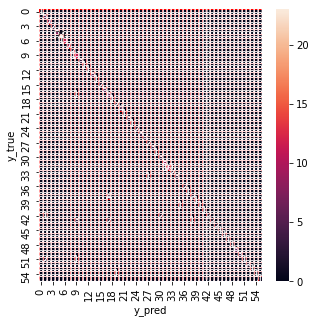

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [29]:
import pickle

pickle.dump(clf,open('crop.pkl','wb'))
crop = pickle.load(open('crop.pkl','rb'))